In [305]:
import glob
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [340]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def show(data):
    """Visually compare transformations side by side.
        this function will taka a tensor and a list of transformations 
    """
    
    # Here we combine two functions from basic python to validate the input to the function:
    # - `all` takes an iterable (something we can loop over, e.g. a list) of booleans
    #    and returns True if every element is True, otherwise it returns False.
    # - `isinstance` checks whether a variable is an instance of a particular type (class)
        
    num = len(data)
    fig, axes = plt.subplots(num, 1, figsize=(5, 5*num))
    
    for axis, (id, var, mean, median, preds) in zip(axes, data):
        lables = ', '.join([str(round(l, 2)) for l in preds])
        axis.set_title(f"{id}, {var:.2f}, {mean:.2f}, {median:.2f}, ({lables})").set_fontsize(14)
        axis.imshow(mpimg.imread(f'test/{id}.jpg'))

    plt.show()

In [374]:
subs = glob.glob("q7/submission*aug_99*.csv")
vote = len(subs)
names = [s.split("_")[3]+"_"+s.split("_")[-1][:3] for s in subs]
subs, names, vote

(['q7/submission_asma_arty_wide_resnet101_2_trans_aug_996.csv',
  'q7/submission_asma_arty_resnext101_64x4d_trans_aug_995.csv',
  'q7/submission_asma_arty_resnet152_trans_aug_995.csv'],
 ['wide_996', 'resnext101_995', 'resnet152_995'],
 3)

In [375]:
data = defaultdict(list)
for path in subs:
    with open(path, "r") as f:
        lines = f.readlines()
    for l in lines[1:]:
        id, pred = l.strip().split(",")
        data[int(id)].append(float(pred))

In [376]:
res = []
for id, preds in data.items():
    d = np.array(preds)
    var =  d.var()
    mean =  d.mean()
    median =  np.median(d)
    res.append((id, var, mean, median, preds))


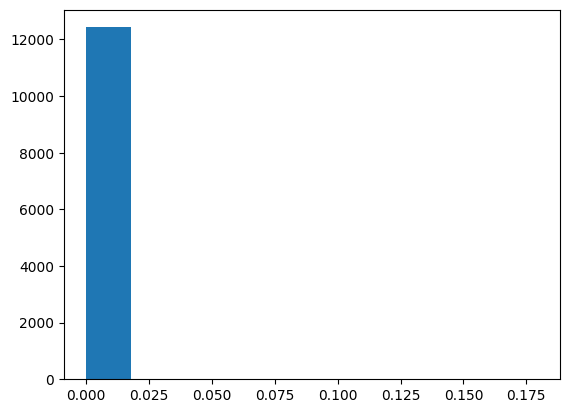

In [377]:
_, vars, *_ = zip(*res)

plt.hist(vars);

In [378]:
res_variance = sorted(res, key=lambda x: x[1], reverse=True) 

['wide_996', 'resnext101_995', 'resnet152_995']


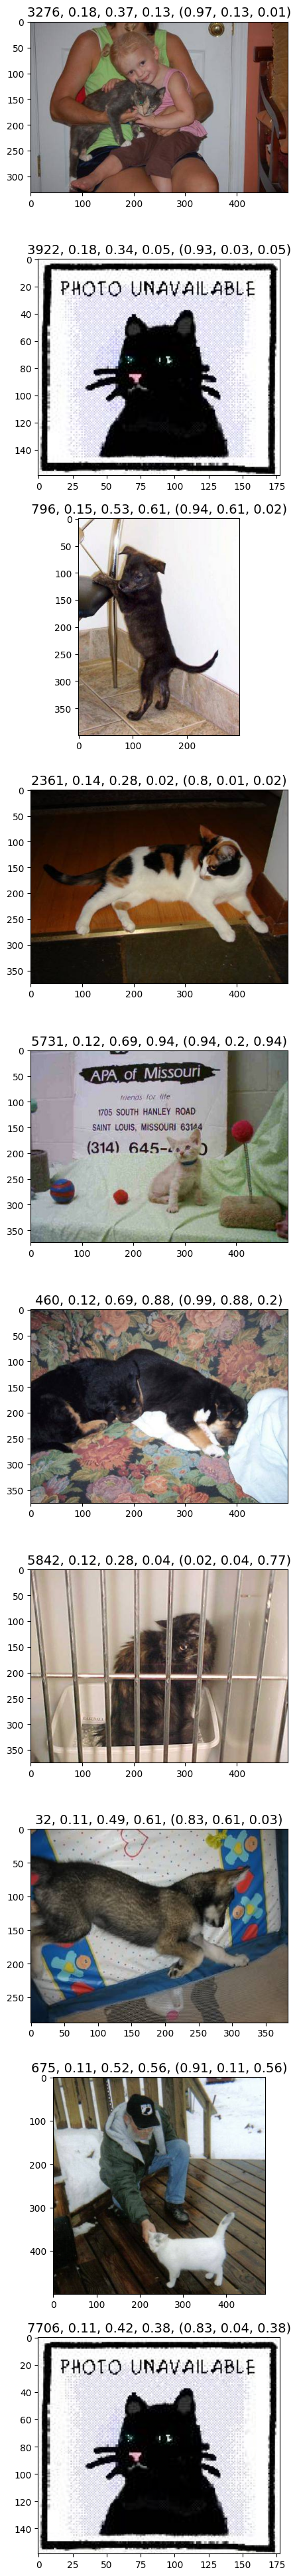

In [379]:
print(names)
show(res_variance[:10])

In [380]:
res_mean_half = sorted(res, key=lambda x: abs(x[2]-0.5), reverse=False)

['wide_996', 'resnext101_995', 'resnet152_995']


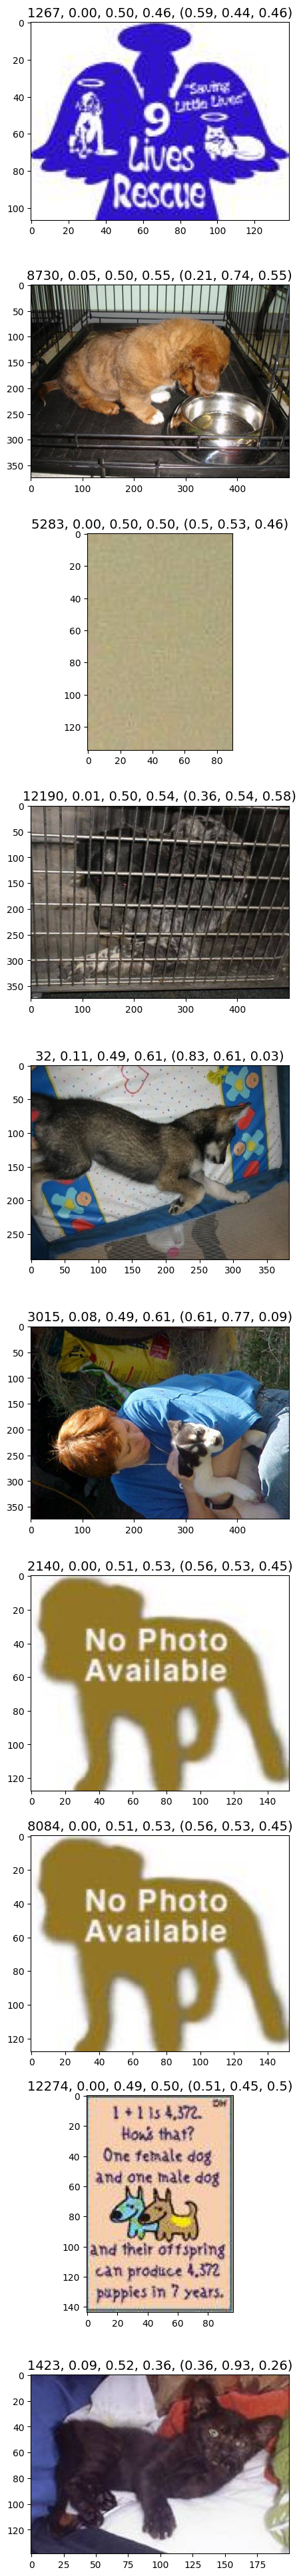

In [381]:
print(names)
show(res_mean_half[:10])

In [383]:
with open("final_submission_asma_arty.csv", "w") as f:
    f.write("id,label\n" + "\n".join([f"{id},{median}" for id, var, mean, median, preds in res]))